In [57]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape

# Load Dataset

In [58]:
datatest = pd.read_csv("occupancy+detection/datatest.txt")
datatest2 = pd.read_csv("occupancy+detection/datatest2.txt")
datatraining = pd.read_csv("occupancy+detection/datatraining.txt")

# EDA

In [59]:
print(datatest.info())
datatest.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [60]:
print(datatest2.info())
datatest2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [61]:
print(datatraining.info())
datatraining.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


All text files has seven columns as date, temperature, humidity, light, CO2, humidity ratio and occupancy.

- Temperature in Celsius.
- Relative humidity as a percentage.
- Light measured in lux.
- Carbon dioxide measured in parts per million.
- Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
- Occupancy as either 1 for occupied or 0 for not occupied.

In [62]:
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)
datatraining.reset_index(drop=True, inplace=True)

In [63]:
datatraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8143 non-null   datetime64[ns]
 1   Temperature    8143 non-null   float64       
 2   Humidity       8143 non-null   float64       
 3   Light          8143 non-null   float64       
 4   CO2            8143 non-null   float64       
 5   HumidityRatio  8143 non-null   float64       
 6   Occupancy      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 445.4 KB


In [64]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


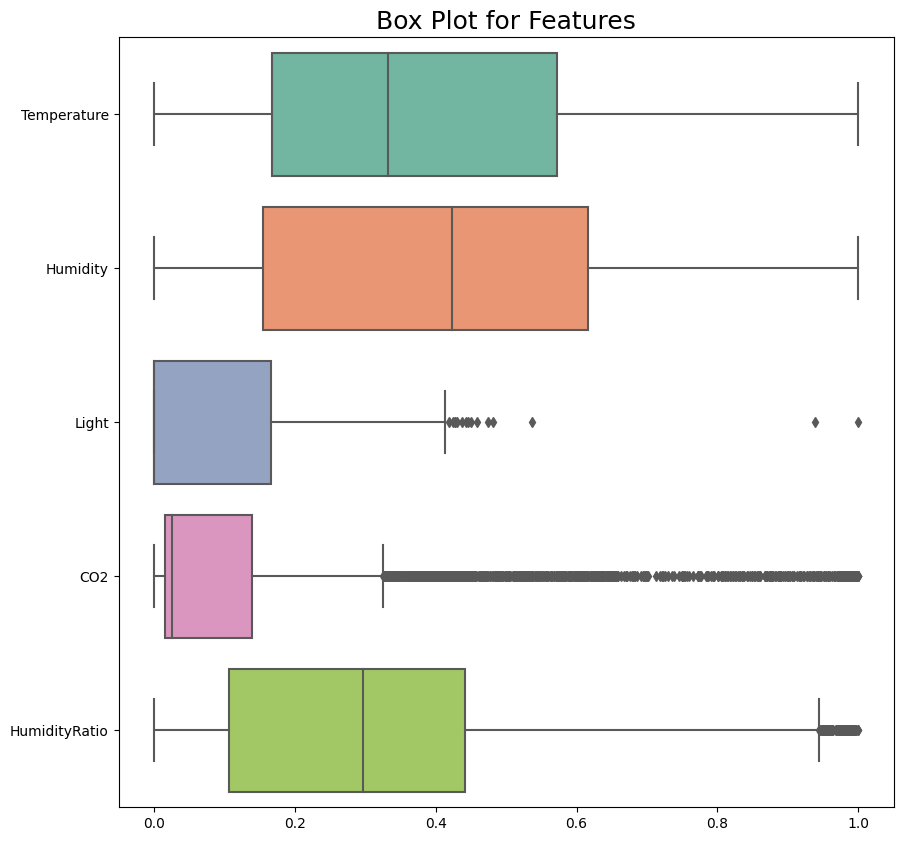

In [65]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=datatraining.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(datatraining.drop(['date', 'Occupancy'],axis=1).describe())

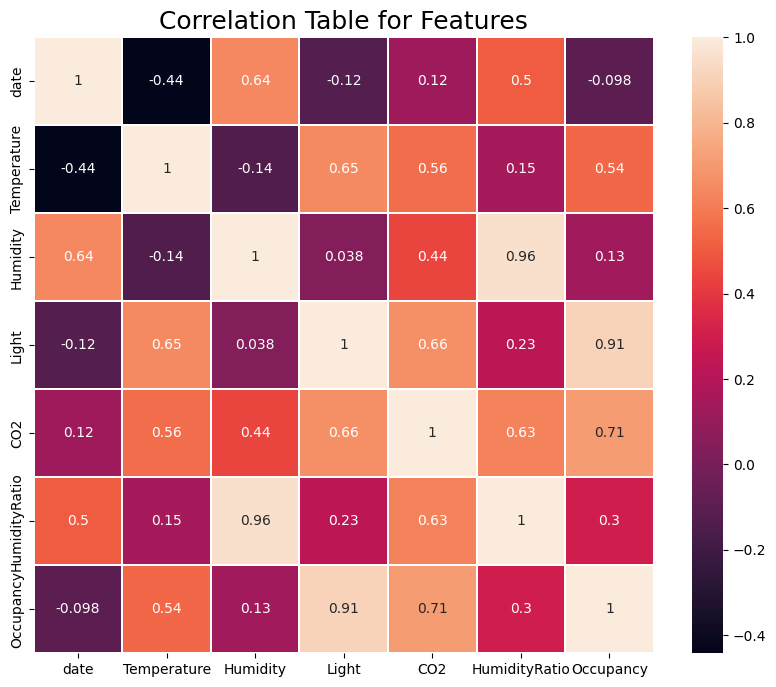

In [66]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=.2)

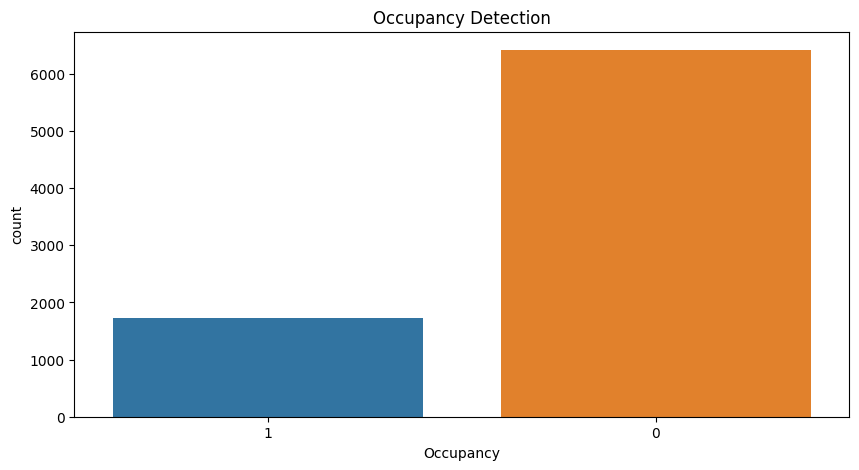

In [67]:
data = datatraining.copy()
data.Occupancy = data.Occupancy.astype(str)
#plotting the data
plt.figure(figsize=(10,5))
sns.countplot(x='Occupancy',data=data)
plt.title('Occupancy Detection')
plt.show()

# Split data into train and test

In [68]:
X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_test = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest['Occupancy']

# SVM

In [69]:
from sklearn import svm
from sklearn.svm import SVC
#SVM classification
svm = SVC()
svm.fit(X_train, y_train)
#predicting with svm
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"The Accuracy is :{svm_acc}")

The Accuracy is :0.975234521575985


# KNN

In [70]:
#Find the best value of hyperparameter
r = 0
i = 1
k = 1
while i <= math.sqrt(X_train.shape[0]):
    knn= KNeighborsClassifier(i, weights='distance', algorithm='auto' , leaf_size= 20, metric= 'minkowski')  
    knn.fit(X_train, y_train)
    y_pred_knn=knn.predict(X_test)
    r2 = accuracy_score(y_test,y_pred_knn)
    if r2 > r:
        r = r2
        k = i
    i += 1

if(k%2 == 0):
    k=k+1

print("Best value of hyperparameter k:", k)

Best value of hyperparameter k: 85


In [71]:
knn = KNeighborsClassifier(k, weights='distance', algorithm='auto', leaf_size= 20, metric= 'minkowski')  
knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)

In [72]:
knn_acc = accuracy_score(y_test,y_pred_knn)
print(f"The Accuracy is :{knn_acc}")

The Accuracy is :0.9778611632270169


# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
# Create the Decision Tree regression model
tree_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(tree_model, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and random state from the GridSearchCV
best_params = grid_search.best_params_
best_random_state = grid_search.best_estimator_.random_state

# Create the final Decision Tree model with the best hyperparameters and random state
final_tree_model = DecisionTreeClassifier(random_state=best_random_state, **best_params)

# Fit the final model to the training data
final_tree_model.fit(X_train, y_train)

y_pred_tree=final_tree_model.predict(X_test)

In [74]:
tree_acc = accuracy_score(y_test,y_pred_tree)
print(f"The Accuracy is :{tree_acc}")

The Accuracy is :0.8255159474671669


# XgBoost

In [75]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = xgbc.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
print(f"The Accuracy is :{xgb_acc}")

The Accuracy is :0.9433395872420263


# LSTM

In [83]:
# Train the model
model1=tf.keras.Sequential()
model1.add(LSTM(100,input_shape=(5,1)))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(Dense(32))
model1.add(Dense(16))
model1.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
opt_adam = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
history=model1.fit(X_train,y_train, epochs=20, batch_size=70,validation_data=(X_test,y_test),
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)],verbose=1,shuffle=False)
# model.summary()

Epoch 1/20
117/117 [==============================] - 3s 16ms/step - loss: 0.6809 - accuracy: 0.8332 - val_loss: 0.3891 - val_accuracy: 0.8886
Epoch 2/20
117/117 [==============================] - 1s 6ms/step - loss: 0.3891 - accuracy: 0.8373 - val_loss: 0.9102 - val_accuracy: 0.7006
Epoch 3/20
117/117 [==============================] - 1s 5ms/step - loss: 0.4093 - accuracy: 0.8585 - val_loss: 0.7990 - val_accuracy: 0.7392
Epoch 4/20
117/117 [==============================] - 1s 5ms/step - loss: 0.4043 - accuracy: 0.8684 - val_loss: 1.1481 - val_accuracy: 0.7587
Epoch 5/20
117/117 [==============================] - 1s 5ms/step - loss: 0.3906 - accuracy: 0.8895 - val_loss: 1.0799 - val_accuracy: 0.7159
Epoch 6/20
117/117 [==============================] - 1s 5ms/step - loss: 0.5156 - accuracy: 0.8352 - val_loss: 0.5739 - val_accuracy: 0.7062
Epoch 7/20
117/117 [==============================] - 1s 5ms/step - loss: 0.3905 - accuracy: 0.8587 - val_loss: 0.7225 - val_accuracy: 0.6507
Epoch

In [84]:
lstm_acc = model1.evaluate(X_test, y_test)[1]
print(f"The Accuracy is :{lstm_acc}")

84/84 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8368
The Accuracy is :0.8367729783058167


# Compare results

In [85]:
#sort by model by accuracy
models = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'XgBoost', 'Decision Tree', 'LSTM'],
    'Score': [svm_acc, knn_acc, xgb_acc, tree_acc, lstm_acc]})
models = models.sort_values(by='Score', ascending=False)
models

,Model,Score
1,KNN,0.977861
0,SVM,0.975235
2,XgBoost,0.943340
4,LSTM,0.836773
3,Decision Tree,0.825516


# Occupancy Detection with ML and DL Methods

# Introduction:
This task presents an analysis of occupancy detection using various machine learning models. The goal is to predict the occupancy status of a space based on provided features. A range of classification models have been applied to the dataset, including K-Nearest Neighbors (KNN), Support Vector Machine (SVM), XGBoost, Decision Tree,  and Long Short-Term Memory (LSTM). This documentation provides insights into the performance of these models in predicting occupancy status.

# Dataset:
The Occupancy Detection dataset contains features related to occupancy and environmental conditions of a space. Each observation includes attributes such as temperature, humidity, and light level. The binary classification task involves predicting whether the space is occupied (1) or unoccupied (0) at a given time.

# K-Nearest Neighbors (KNN):
The KNN model is a non-parametric model that classifies a new data point based on the majority class of its k nearest neighbors. The KNN model is trained using the training set. The model is then used to predict the occupancy status of the testing set. The accuracy of the model is then calculated by comparing the predicted labels to the actual labels of the testing set. The accuracy of the KNN model is 0.98.

# Support Vector Machine (SVM):
The SVM model is a supervised learning model that classifies a new data point based on its position relative to a hyperplane. The SVM model is trained using the training set. The model is then used to predict the occupancy status of the testing set. The accuracy of the model is then calculated by comparing the predicted labels to the actual labels of the testing set. The accuracy of the SVM model is 0.975.

# XGBoost:
The XGBoost model is an ensemble learning model that uses a gradient boosting framework. The XGBoost model is trained using the training set. The model is then used to predict the occupancy status of the testing set. The accuracy of the model is then calculated by comparing the predicted labels to the actual labels of the testing set. The accuracy of the XGBoost model is 0.94.

# Decision Tree:
The Decision Tree model is a supervised learning model that uses a tree-like structure to classify a new data point. The Decision Tree model is trained using the training set. The model is then used to predict the occupancy status of the testing set. The accuracy of the model is then calculated by comparing the predicted labels to the actual labels of the testing set. The accuracy of the Decision Tree model is 0.82.

# Long Short-Term Memory (LSTM):
The LSTM model is a recurrent neural network that uses a memory cell to classify a new data point. The LSTM model is trained using the training set. The model is then used to predict the occupancy status of the testing set. The accuracy of the model is then calculated by comparing the predicted labels to the actual labels of the testing set. The accuracy of the LSTM model is 0.84.

# Conclusion:
The Occupancy Detection Model Comparison analysis provides valuable insights into the performance of various classification models. KNN and SVM demonstrated the highest accuracy scores, closely followed by XGBoost. The documentation offers a comprehensive view of the comparison process, aiding readers in understanding the strengths and weaknesses of each model's performance in predicting occupancy status. This knowledge enables informed decision-making when selecting the most suitable model for occupancy detection scenarios.